**Sikit-Learn Cheat Sheet**
![머신러닝 로드맵](sikit.PNG)

# 데이터셋
- Pregnancies: 임신횟수
- Glucose: 2시간동안 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure: 이완기 혈압(mm Hg)
- SkinThickness: 삼두근 피부 주름 두께(mm), 체지방을 추정하는데 사용되는 값
- Insulin: 2시간동안 혈청 인슐린
- BMI: 체질량 지수
- DiabetesPedigreeFunction: 당뇨병 혈통 기능
- Age: 나이
- Outcome: 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0 입니다.

# 필요한 라이브러리 로드

In [1]:
# 데이터분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터셋 로드

In [2]:
df = pd.read_csv('../02_EDA를 통해 데이터탐색/diabetes.csv')
print(df.shape)
df.head(3)     

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


# 학습, 예측 데이터셋 나누기

In [3]:
# label 값을 기준으로 나눕니다.
# 나누기 전에 label 값을 시각화 합니다.

(df['Insulin'] > 0).value_counts() # 394개의 학습세트로 374개를 예측으로 결측치를 채워줄 예정

True     394
False    374
Name: Insulin, dtype: int64

In [4]:
# train 세트를 만듭니다.

train = df[df['Insulin'] > 0].copy()
train.shape

(394, 9)

In [5]:
# test 세트를 만듭니다.

test = df[df['Insulin'] == 0].copy()
test.shape

(374, 9)

# EDA
피처엔지니어링을 EDA을 해서 해보게 된다.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

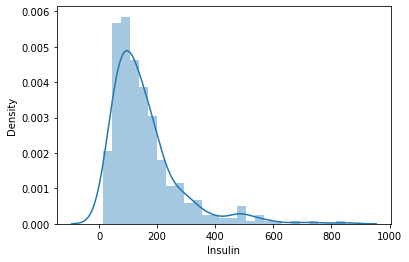

In [6]:
sns.distplot(train['Insulin'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Insulin'>

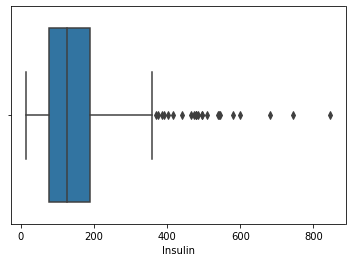

In [7]:
sns.boxplot(train['Insulin'])

In [8]:
desc = train['Insulin'].describe()
desc

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

In [9]:
# IQR = 3IQR - 1IQR
# OUT = 3IQR + (IQR * 1.5)

IQR = desc.loc['75%'] - desc.loc['25%']
OUT = desc.loc['75%'] + (IQR * 1.5)

In [10]:
train[train['Insulin'] > OUT].shape

(24, 9)

In [11]:
print(train.shape)
train = train[train['Insulin'] < OUT]
train.shape

(394, 9)


(370, 9)

# 학습, 예측에 사용할 컬럼

In [12]:
# feature_names 라는 변수에 학습과 에측에 사용할 컬럼명을 가져옵니다.

feature_names = test.columns.tolist()
feature_names.remove('Insulin')
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

# 정답값이자 예측해야 될 값

In [13]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.

label_name = 'Insulin'
label_name

'Insulin'

# 학습, 예측 데이터셋 만들기

In [14]:
# 학습 세트 만들기 예) 시험의 기출문제

X_train = train[feature_names]
X_train.shape

(370, 8)

In [15]:
# 정답 값을 만들어 줍니다. 예) 기출문제의 정답

y_train = train[label_name]
y_train.shape

(370,)

In [16]:
# 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제

X_test = test[feature_names]
X_test.shape

(374, 8)

In [17]:
# 예측의 정답값 예) 실전 시험 문제의 정답

y_test = test[label_name]
y_test.shape

(374,)

# 머신러닝 알고리즘 가져오기
- 학습목표
    - 크로스 밸리데이션으로 모델을 검증하는 방법을 이해합니다.


- 핵심 키워드
    - cross_val_predict()
    - r2_score
    
    
- SVM
    - 분류: SVC
    - 회귀: SVR

In [18]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

estimators = [DecisionTreeRegressor(random_state=42),
         RandomForestRegressor(random_state=42),
         GradientBoostingRegressor(random_state=42),]

estimators

[DecisionTreeRegressor(random_state=42),
 RandomForestRegressor(random_state=42),
 GradientBoostingRegressor(random_state=42)]

In [19]:
max_depth = np.random.randint(5, 30, 10)
max_depth

array([28, 26, 21, 11, 14,  9,  6, 29, 23, 23])

In [20]:
max_features = np.random.uniform(0.3, 1.0, 10)
max_features

array([0.53304597, 0.39637002, 0.52724778, 0.45552605, 0.93614909,
       0.59947697, 0.63172595, 0.59763615, 0.38841648, 0.6549922 ])

In [21]:
results = []
for estimator in estimators:
    result = []
    result.append(estimator.__class__.__name__)
    results.append(result)
    

pd.DataFrame(results)

,0
0,DecisionTreeRegressor
1,RandomForestRegressor
2,GradientBoostingRegressor


In [51]:
from sklearn.model_selection import RandomizedSearchCV

results = []
for estimator in estimators:
    result = []

    max_depth = np.random.randint(5, 30, 1000)
    max_features = np.random.uniform(0.3, 1.0, 1000)

    param_distributions = {'max_depth': max_depth, 'max_features': max_features}


    regressor = RandomizedSearchCV(estimator,
                       param_distributions=param_distributions,
                       n_iter=1000,
                       scoring=None,
                       n_jobs=-1,
                       cv=5,
                       verbose=2,
                       random_state=42)

    regressor.fit(X_train, y_train)
    
    result.append(estimator.__class__.__name__)
    result.append(regressor.best_params_)
    result.append(regressor.best_estimator_)
    result.append(regressor.best_score_)
    result.append(regressor.cv_results_)
    
    results.append(result)

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 230 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 2432 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 6960 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 12800 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 19920 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 28352 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 38064 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 49088 tasks      | elapsed:   50.0s
[Parallel(n_jobs=-1)]: Done 50000 out of 50000 | elapsed:   51.1s finished


Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 3249 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 4869 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 5800 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 6813 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 7906 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 9081 tasks      | 

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 634 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 1930 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 2820 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 3874 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done 5088 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 6466 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 8004 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9706 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 11568 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 13594 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 15780 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 18130 tasks  

In [52]:
df_cv = pd.DataFrame(results)
df_cv.columns = ['model', 'params', 'estimator', 'r2_score', 'cv_result']
df_cv

,model,params,estimator,r2_score,cv_result
0,DecisionTreeRegressor,"{'max_features': 0.991354493831192, 'max_depth...","DecisionTreeRegressor(max_depth=5, max_feature...",0.222069,"{'mean_fit_time': [0.004683637619018554, 0.004..."
1,RandomForestRegressor,"{'max_features': 0.5550303219344175, 'max_dept...","(DecisionTreeRegressor(max_depth=5, max_featur...",0.349482,"{'mean_fit_time': [0.23386087417602539, 0.2305..."
2,GradientBoostingRegressor,"{'max_features': 0.35411167745849614, 'max_dep...",([DecisionTreeRegressor(criterion='friedman_ms...,0.309764,"{'mean_fit_time': [0.1017519474029541, 0.15950..."


In [53]:
best_estimator = df_cv.loc[1, 'estimator']
best_estimator

RandomForestRegressor(max_depth=5, max_features=0.5550303219344175,
                      random_state=42)

# 학습(훈련)
- 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [54]:
best_estimator.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features=0.5550303219344175,
                      random_state=42)

# Cross-Validation 으로 학습 세트의 오차 측정하기

In [58]:
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(best_estimator, X_train, y_train, cv=100, n_jobs=-1, verbose=2)
y_predict[:5]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.7s finished


array([ 59.17253927, 170.52621782,  82.30723671, 148.51115599,
       164.23282153])

In [59]:
# 정답을 정확하게 맞춘 갯수
(y_predict == y_train).sum()

0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Insulin'>

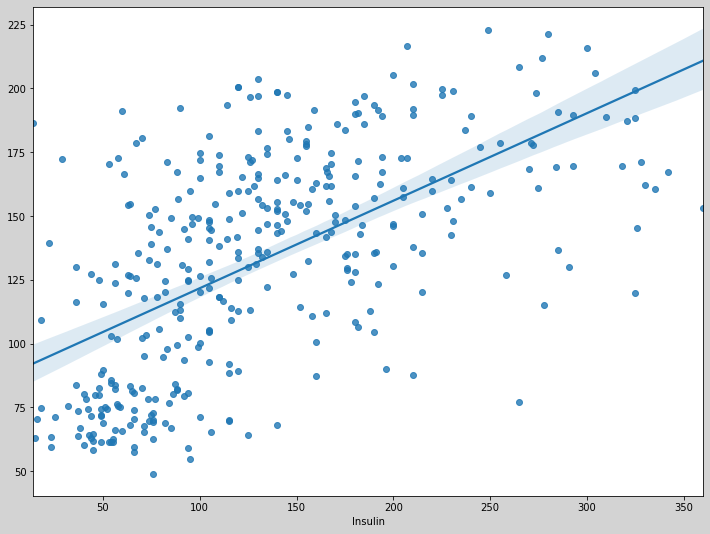

In [60]:
# regplot 으로 결과 값을 비교합니다.
# 데이터가 선 근처에 모여 있어야 정확하게 예측한것..

plt.figure(figsize=(12, 9), facecolor='lightgrey')
sns.regplot(y_train, y_predict)

In [61]:
# r2_score 를 구합니다.
from sklearn.metrics import r2_score

r2_score(y_train, y_predict) # 1에 가까워야 제대로 예측한것

0.35344027281641344

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

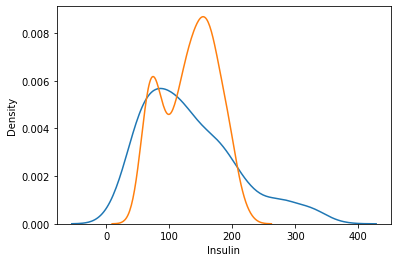

In [62]:
# distplot 으로 정답값과 예측값의 분포를 그립니다.

sns.distplot(y_train, label='train', hist=False)
sns.distplot(y_predict, label='predict', hist=False)

# 오차 구하기

- 학습목표
    - 모델이 예측한 값과 실제 값의 차이를 구하는 공식을 이해합니다.
    

- 핵심키워드
    - MAE : 평균절대오차
    - RMSE

In [63]:
# MAE (Mean Absolute Error) 평균절대오차
# 오차값의 평균

# 86 => 이상치 제거 전
# 77 => 이상치 제거 후 (Insulin < 600)
# 62 => 이상치 제거 후 (Insulin < OUT)
# 44 => RandomSearchCV 로 하이퍼 파라미터 찾음

error = abs(y_train - y_predict) # 실제값과 예측값의 차이
error.mean()

44.36058188827816

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

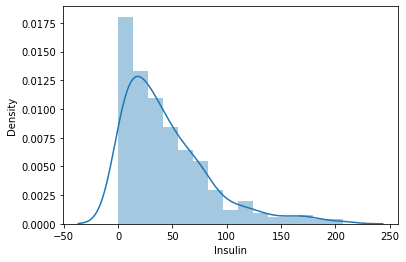

In [64]:
# 오차 시각화

sns.distplot(error)

In [65]:
error.describe()

count    370.000000
mean      44.360582
std       39.934059
min        0.035833
25%       14.180835
50%       34.032207
75%       64.117157
max      206.828105
Name: Insulin, dtype: float64

In [66]:
# RMSE (Root Mean Square Error)
# 회귀에서 주로 사용하는 오차측정법
# 표준편차를 구하는 공식과 비슷하게 생겼다.

# 126 => 이상체 제거 전
# 114 => 이상치 제거 후 (Insulin < 600)
# 84 => 이상치 제거 후 (Insulin < OUT)

np.sqrt(((y_train - y_predict) ** 2).mean()) # 실제값과 예측값의 차이

59.651322046823175

# 트리 알고리즘 분석하기
- 의사결정나무를 시각화 합니다.
- 피처의 중요도를 구합니다.

- 학습목표
    - 회귀로 학습한 결과물을 시각화하기
    
    
- 핵심키워드
    - plot_tree()
    - feature_inportances_

In [39]:
# 피처의 중요도를 추출하기

best_estimator.feature_importances_

array([0.03121576, 0.51549481, 0.03657361, 0.07915462, 0.11312651,
       0.06912435, 0.08991695, 0.06539339])

<AxesSubplot:>

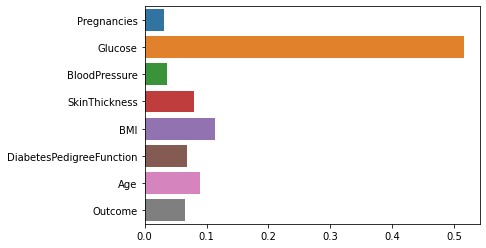

In [40]:
# 피처의 중요도 시각화 하기

sns.barplot(x=best_estimator.feature_importances_, y=feature_names)

# 예측
<pre>
    실전 시험문제(X_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.
    Insulin 이 0인 값을 예측 했기 때문에 정답을 알 수 없습니다.
    따라서 점수는 train set로 측정한 값을 참고합니다.
</pre>

- 학습 목표
    - 예측한 값을 분석하고, 시각화할 수 있습니다.
    
    
- 핵심 키워드
    - groupby()
    - barplot()

In [48]:
y_test = best_estimator.predict(X_test)
y_test[:5]

array([184.85590414,  66.15999115, 194.15117544, 158.60908725,
       164.56948294])

In [49]:
# groupby

# train.groupby('Outcome')['Insulin'].agg(['mean', 'median'])
train.groupby('Outcome')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,254.0,115.917323,69.844697,15.0,64.25,100.0,151.00,342.0
1,116.0,169.163793,70.789454,14.0,124.25,160.0,207.75,360.0


In [50]:
test['Insulin'] = y_test
test.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,184.855904,33.6,0.627,50,1
1,1,85,66,29,66.159991,26.6,0.351,31,0
2,8,183,64,0,194.151175,23.3,0.672,32,1


In [44]:
test.groupby('Outcome')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,236.0,133.874576,42.087694,58.613779,95.707791,137.374367,169.646622,224.286953
1,138.0,173.230519,24.666723,99.071997,158.867555,175.247803,189.651781,230.234639


<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

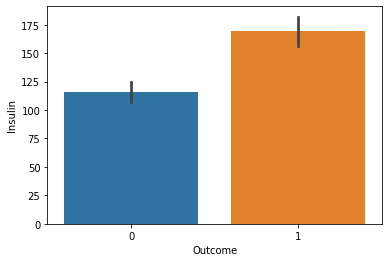

In [45]:
# 시각화
# Insulin 평균값을 출력

sns.barplot(data=train,
            x='Outcome',
            y='Insulin')

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

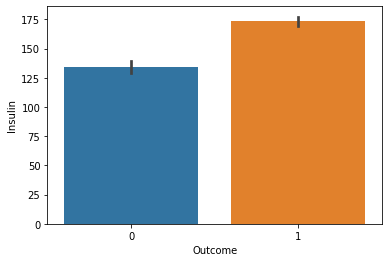

In [46]:
sns.barplot(data=test,
            x='Outcome',
            y='Insulin')

# 예측값을 csv 파일로 저장하기

In [71]:
df.loc[df['Insulin'] == 0, 'Insulin']

0      0
1      0
2      0
5      0
7      0
      ..
761    0
762    0
764    0
766    0
767    0
Name: Insulin, Length: 374, dtype: int64

In [73]:
df.loc[df['Insulin'] == 0, 'Insulin'] = test['Insulin']

In [74]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,184.855904,33.6,0.627,50,1
1,1,85,66,29,66.159991,26.6,0.351,31,0
2,8,183,64,0,194.151175,23.3,0.672,32,1
3,1,89,66,23,94.000000,28.1,0.167,21,0
4,0,137,40,35,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.000000,32.9,0.171,63,0
764,2,122,70,27,158.864719,36.8,0.340,27,0
765,5,121,72,23,112.000000,26.2,0.245,30,0
766,1,126,60,0,173.264307,30.1,0.349,47,1


In [75]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [87]:
df.to_csv('diabetes_fill_insulin.csv', index=False)

In [88]:
pd.read_csv('diabetes_fill_insulin.csv')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,184.855904,33.6,0.627,50,1
1,1,85,66,29,66.159991,26.6,0.351,31,0
2,8,183,64,0,194.151175,23.3,0.672,32,1
3,1,89,66,23,94.000000,28.1,0.167,21,0
4,0,137,40,35,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.000000,32.9,0.171,63,0
764,2,122,70,27,158.864719,36.8,0.340,27,0
765,5,121,72,23,112.000000,26.2,0.245,30,0
766,1,126,60,0,173.264307,30.1,0.349,47,1
